In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("data/merged_df.csv")
data

,Home Team Name,Away Team Name,G_Home,W_Home,L_Home,W-L%_Home,SRS_Home,SOS_Home,W.1_Home,L.1_Home,...,home_other_3s,home_paint,home_rim,home_lc3,home_rc3,away_other_3s,away_paint,away_rim,away_lc3,away_rc3
0,Davidson,Charleston Southern,32,17,15,0.531,6.45,4.26,8,10,...,0.071341,-0.051337,-0.103092,-0.059322,-0.062500,-0.051337,-0.015292,0.007718,-0.260000,-0.096364
1,Dayton,Ball State,32,24,8,0.750,12.98,4.27,15,3,...,-0.061254,-0.032832,0.077845,0.150000,0.064815,-0.032832,-0.001323,-0.022727,0.231579,0.060150
2,Fordham,Miami (OH),32,13,19,0.406,-1.97,1.36,7,11,...,-0.000324,-0.150943,-0.024895,0.233716,0.302682,-0.150943,-0.067323,-0.035361,-0.074713,-0.074713
3,George Mason,Lafayette,34,20,14,0.588,3.01,1.28,9,9,...,-0.225370,-0.104292,-0.110729,-0.049351,-0.126794,-0.104292,-0.011627,-0.063662,-0.071429,0.116071
4,Richmond,Delaware,35,22,13,0.629,5.45,3.28,13,5,...,0.043774,-0.025291,-0.145833,-0.474359,-0.311828,-0.025291,0.016026,-0.078688,-0.571429,-0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,New Mexico State,Grand Canyon,34,28,6,0.824,4.66,-3.82,11,3,...,0.107071,-0.179837,0.092523,0.263158,0.062201,-0.179837,-0.061093,-0.017193,-0.400000,0.200000
5228,Rhode Island,Davidson,35,25,10,0.714,12.88,4.62,13,5,...,0.011739,-0.030364,-0.023202,-0.082642,-0.063175,-0.030364,0.050788,0.022787,0.098573,0.095395
5229,Cincinnati,Houston,36,30,6,0.833,18.43,5.49,16,2,...,0.051771,0.032547,0.094385,-0.164263,0.004076,0.032547,0.048858,0.121509,0.163237,0.217705
5230,Harvard,Pennsylvania,28,18,10,0.643,2.30,-2.24,10,4,...,-0.023810,0.027273,-0.044517,-0.006061,-0.022727,0.027273,0.015735,0.011175,0.367521,0.298077


In [3]:
X = data.iloc[:,2:64]
y = data.iloc[:,64]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = svm.SVC()
clf.fit(X_train, y_train)

/home/matteo/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


SVC()

In [6]:
clf.score(X_test,y_test)

/home/matteo/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


0.6571155682903533

In [7]:
from sklearn.feature_selection import RFE

# Create the RFE model and select 1 feature
rfe = RFE(clf, 6)
fit = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

### PCA

In [9]:
scores = []

for i in range(1,30):
    # Assuming 'X' is your data matrix
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
    #X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    clf2 = svm.SVC()
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

/home/matteo/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/matteo/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/matteo/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/matteo/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and wil

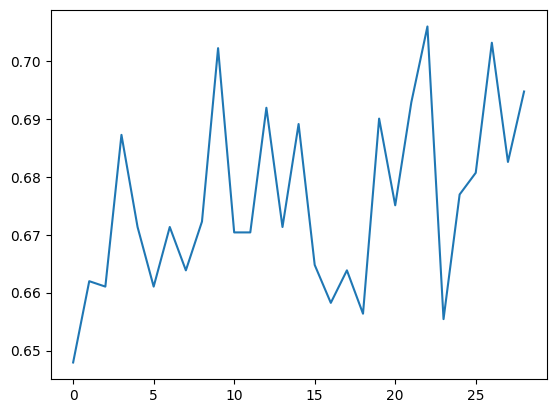

In [10]:
plt.plot(scores)

Based on the above it doesn't make sense to do PCA. We should instead maybe do some different feature testing...